In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sber_data = pd.read_csv('data/sber_data.csv')
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

describe(). Рассчитаем статистические показатели для признака жилой площади (life_sq).

In [16]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

min = 0 - квартиры с нулевой площадью
max = 7478, а 75 квантиль = 43

In [17]:
display(sber_data[sber_data['life_sq'] == 0].shape[0])

45

Это могут быть апартаменты — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое.     

In [18]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


Выброс налицо: гигантская жилая площадь (life_sq), да ещё почти в 100 раз превышает общую площадь (full_sq).

найдём квартиры у которых жил. площадь больше суммарной.

In [19]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:

In [20]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


In [21]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [22]:
display(sber_data[sber_data['floor']> 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Всего одна квартира в Ломоносовском районе. Пора идти в интернет в поиске самых высоких зданий в Москве! 

Убеждаемся в том, что здания выше 70 этажей находятся на территории комплекса Москва-Сити (Пресненский район). В Ломоносовском районе таких жилых высоток нет. Получается, что данное наблюдение — выброс.

Вы наверняка обратили внимание на сложность ручного поиска. Мы заранее знали про апартаменты и о том, что не бывает квартир с жилой площадью, которая превышает общую. Кроме того, мы «нагуглили» информацию о московских высотках. Однако бывают данные, где необходимо углубиться в предметную область, чтобы понять, что наблюдения являются «сверхъестественными».

МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

Text(0.5, 1.0, 'Full Square Boxplot')

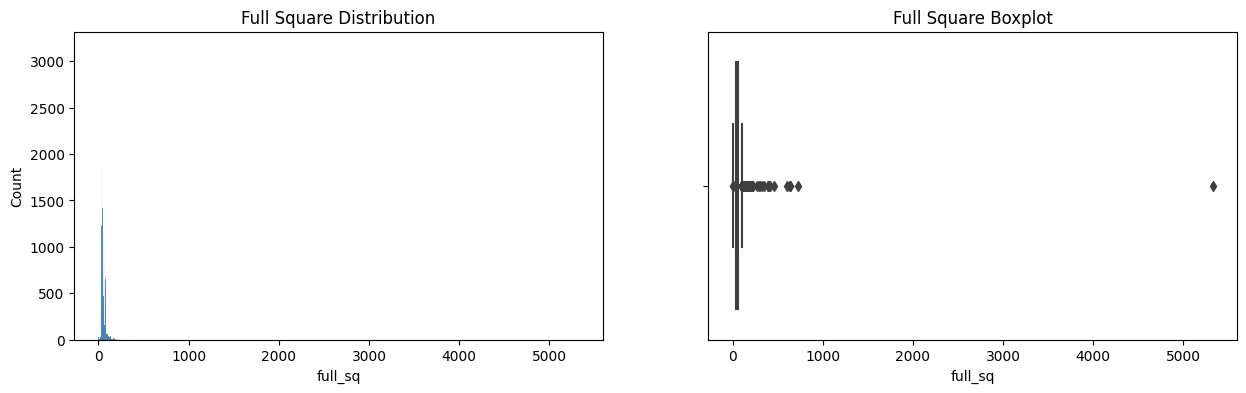

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0])
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1])
boxplot.set_title('Full Square Boxplot')

Основная масса квартир имеет общую площадь менее 250 квадратных метров, и лишь несколько невзрачных наблюдений выбиваются из этого интервала. Максимальная площадь, судя по гистограмме, превышает 5 000 квадратных метров.

Визуализация помогает определить наличие выбросов. Для того чтобы их найти, можно воспользоваться статистическими подходами. 

Одним из таких подходов является метод межквартильного размаха (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.

Алгоритм метода:

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — Q25 и Q75 для признака, который мы исследуем;

→ вычислить межквартильное расстояние: IQR = Q75-Q25 ;

→ вычислить верхнюю и нижнюю границы Тьюки: 
    bound(lower) = Q25-1,5*IQR
    bound(upper) = Q75+1,5*IQR

→ найти наблюдения, которые выходят за пределы границ.

В соответствии с этим алгоритмом напишем функцию outliers_iqr(), которая вам может ещё не раз пригодиться в реальных задачах. Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [24]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [25]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

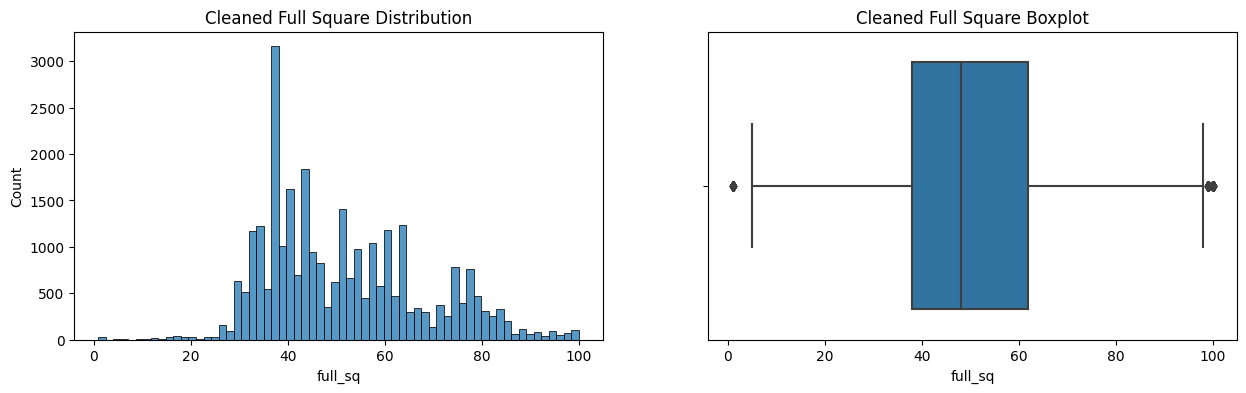

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleaned Full Square Boxplot')

Выбросы остались, площадь урезалась до 100.
Выбросы - норма, они расчитались заново.

Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

У нас же распределение (даже после отсечения выбросов) отличается от заявленных критериев. Оно несимметрично: правый хвост изначального распределения гораздо длиннее левого (для Москвы вполне естественны квартиры с площадью свыше 100 квадратных метров) и вовсе не колоколообразно. Попросту говоря, выбор метода поиска не оправдал себя.

Никто не говорил, что вы должны должны ограничиваться только 1.5 межквартильных размахов. Вы можете сами подбирать число размахов влево и/или вправо и таким образом отбирать выбросы, учитывая особенности ваших данных. 

6.1 Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

Назовите измененную функцию: outliers_iqr_mod`

Можете протестировать работу функции на DataFrame test_sber_data.csv.

In [27]:
full_sq
0           43
1           34
2           43
3           89
4           77
...        ...
30466       44
30467       86
30468       45
30469       64
30470       43

[30471 rows x 1 columns]


SyntaxError: invalid syntax (399723610.py, line 2)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('test_data.csv')

def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

6.2 Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [63]:
def outliers_iqr_mod(data, feature, left = 1, right = 6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

#ответ 59, что за 59?
# ответ в задании 6.7

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

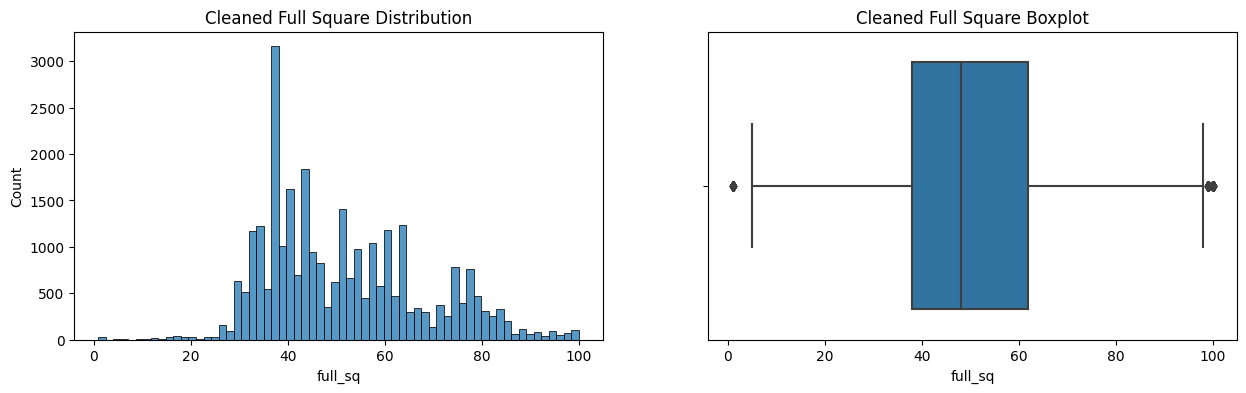

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleaned Full Square Boxplot')

Графики не совпадают с графиками из материала курса !? Имеют меньше выбросов

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Последний метод, который мы рассмотрим, — это метод, основанный на правиле трёх сигм для нормального распределения. 

Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале от(μ - 3σ, μ + 3σ) , где μ (мю) — математическое ожидание (для выборки это среднее значение), а σ (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

?
А что делать, если данные не распределены нормально? 

На такой случай есть один трюк. Иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем, основание логарифма может быть любым.

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

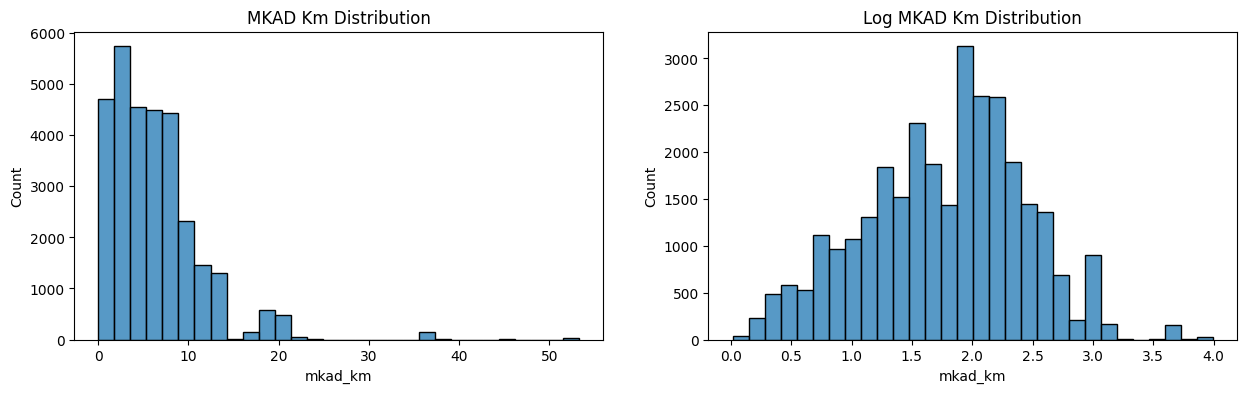

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

Левое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков», далеко отстоящих от основной массы наблюдений.

Взяв натуральный логарифм от левого распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное. Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа. По-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».

Численный показатель асимметрии можно вычислить с помощью метода:

skew():
print(log_mkad_km.skew())


#-0.14263612203024953
* Асимметрия распределения называется правосторонней, если она положительная:

* Асимметрия распределения называется левосторонней, если она отрицательная:

Опиасание алгоритма отклонения метода z-отклонений:

* вычислить математическое ожидание  (среднее) и стандартное отклонение  признака ;

* вычислить нижнюю и верхнюю границу интервала как:

bound(lower) = μ-3σ

bound(upper) = μ+3σ

* найти наблюдения, которые выходят за пределы границ.

Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.



In [29]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [30]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


Итак, метод z-отклонения нашел нам 33 потенциальных выброса по признаку расстояния до МКАД. Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:

In [31]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Наши потенциальные выбросы — это квартиры из поселений «Роговское» и «Киевский». Снова обращаемся к силе интернета и «пробиваем» наших подозреваемых. Эти поселения — самые удалённые районы Москвы; первое из них — это и вовсе граница с Калужской областью. 

?
И тут возникает закономерный вопрос: а стоит ли считать такие наблюдения за выбросы? 

Вопрос в действительности не имеет определенного ответа: с одной стороны, метод прямо-таки говорит нам об этом, а с другой — эти наблюдения имеют право на существование, ведь они являются частью Москвы.

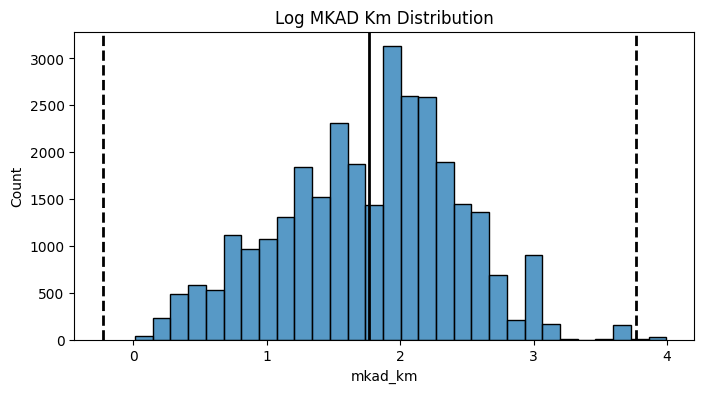

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Итак, что мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берем в интервал, а какие считаем выбросами. Легко заметить, среднее значение (жирная вертикальная линия) находится левее моды, это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой пенек правее верхней границы) — это и есть наши квартиры из из поселений "Роговское" и "Киевский". Очевидно, что если немного (меньше чем на одну сигму) "сдвинуть" верхнюю границу вправо, мы захватим эти наблюдения

6.3 Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

Результирующую функцию назовите outliers_z_score_mod().

Можете протестировать работу функции на DataFrame test_sber_data.csv. Проверять ваше решение мы будем, подавая на вход функции вместо data произвольный датафрейм.

In [38]:
import pandas as pd
import numpy as np

#df = pd.read_csv('test_sber_data.csv')

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


6.4 Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [39]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


#### РЕЗЮМЕ ПО МЕТОДАМ ПОИСКА ВЫБРОСОВ

Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

* Метод ручного поиска тяжело автоматизировать, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод способен выявить логические нестыковки в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.
* Методы межквартильного размаха и z-отклонений довольно просты в реализации и основаны на стройной математической теории, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что далеко не всё в мире имеет нормальное распределение. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.

ДРУГИЕ МЕТОДЫ ПОИСКА ВЫБРОСОВ

Конечно, наука о данных не ограничивается тремя методами. Скажем даже больше: в машинном обучении есть отдельная активно развивающаяся подобласть, именуемая Outliers (Anomaly) Detection. Она включает в себя большое количество методов для поиска аномалий в совершенно различных видах данных: от временных рядов до географических данных. Специалисты этой области обучают целые модели, которые помогают отыскать выбросы в данных. 

Мы рассмотрели самые простые, но очень распространённые методы поиска выбросов, главный недостаток которых состоит в том, что они основываются на информации только по одному признаку. Для глубокого поиска аномалий могут применяться методы, которые используют информацию обо всех признаках.

Например, для поиска аномалий часто используется метод кластеризации DBSCAN, о котором мы ещё будем говорить в модуле по кластеризации данных далее. Метод пытается объединить данные в группы (кластеры), например: квартиры низкого, среднего и премиального класса, опираясь на все признаки. Всё, что не попало ни в какой из кластеров, помечается как выброс (шум).

6.5 Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

Text(0.5, 1.0, 'Log price_doc')

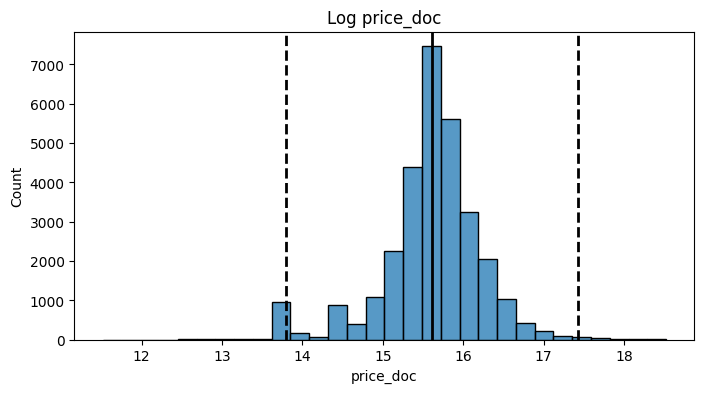

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc= np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc , bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price_doc')

6.6 Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

In [50]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


6.7 Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [62]:
def outliers_iqr_mod(data, feature, left = 3, right = 3, log_scale = True):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3)
    upper_bound = quartile_3 + (iqr * 3)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
